# Step 1. Import library

In [1]:
import pandas as pd; pd.options.mode.chained_assignment = None
import numpy as np

# Built In Imports
from datetime import datetime
from glob import glob
import warnings
import IPython
import urllib
import zipfile
import pickle
import shutil
import string
import math
import tqdm
import time
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from PIL import Image
import matplotlib
import plotly
import PIL
import cv2
from pycocotools.coco import COCO

# Other Imports
from tqdm.notebook import tqdm

LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("Spectral", 10)]
LABEL_COLORS_WOUT_NO_FINDING = LABEL_COLORS[:8]+LABEL_COLORS[9:]

In [10]:
# bbox_df = pd.DataFrame()
# bbox_df['class_id'] = train_df['class_id'].values
# bbox_df['class_name'] = train_df['class_name'].values
# # 정규화 수행
# bbox_df['x_min'] = train_df['x_min'].values / 1024
# bbox_df['x_max'] = train_df['x_max'].values / 1024
# bbox_df['y_min'] = train_df['y_min'].values / 1024
# bbox_df['y_max'] = train_df['y_max'].values / 1024
# bbox_df['frac_x_min'] = train_df['x_min'].values / 1024
# bbox_df['frac_x_max'] = train_df['x_max'].values / 1024
# bbox_df['frac_y_min'] = train_df['y_min'].values / 1024
# bbox_df['frac_y_max'] = train_df['y_max'].values / 1024

# bbox_df

,class_id,class_name,x_min,x_max,y_min,y_max,frac_x_min,frac_x_max,frac_y_min,frac_y_max
0,0,General trash,0.192969,0.727930,0.189160,0.647852,0.192969,0.727930,0.189160,0.647852
1,3,Metal,0.000000,0.056250,0.397852,0.574219,0.000000,0.056250,0.397852,0.574219
2,7,Plastic bag,0.000000,0.141211,0.444922,0.622266,0.000000,0.141211,0.444922,0.622266
3,4,Glass,0.705371,0.973242,0.306055,0.552051,0.705371,0.973242,0.306055,0.552051
4,5,Plastic,0.344922,0.573145,0.655273,0.756250,0.344922,0.573145,0.655273,0.756250
...,...,...,...,...,...,...,...,...,...,...
23139,5,Plastic,0.000000,0.921973,0.113477,0.908496,0.000000,0.921973,0.113477,0.908496
23140,7,Plastic bag,0.295020,0.554004,0.429004,0.640039,0.295020,0.554004,0.429004,0.640039
23141,0,General trash,0.499316,0.556641,0.440527,0.470020,0.499316,0.556641,0.440527,0.470020
23142,1,Paper,0.249023,0.514355,0.411523,0.602051,0.249023,0.514355,0.411523,0.602051


In [11]:
# bbox_np = bbox_df[["class_id", "frac_x_min", "frac_x_max", "frac_y_min", "frac_y_max"]].to_numpy()
# bbox_np

array([[0.        , 0.19296875, 0.72792969, 0.18916016, 0.64785156],
       [3.        , 0.        , 0.05625   , 0.39785156, 0.57421875],
       [7.        , 0.        , 0.14121094, 0.44492188, 0.62226563],
       ...,
       [0.        , 0.49931641, 0.55664062, 0.44052734, 0.47001953],
       [1.        , 0.24902344, 0.51435547, 0.41152344, 0.60205078],
       [1.        , 0.14199219, 0.55234375, 0.28847656, 0.63623047]])

In [9]:
# bbox_df

,class_id,class_name,x_min,x_max,y_min,y_max,frac_x_min,frac_x_max,frac_y_min,frac_y_max
0,0,General trash,0.192969,0.727930,0.189160,0.647852,0.192969,0.727930,0.189160,0.647852
1,3,Metal,0.000000,0.056250,0.397852,0.574219,0.000000,0.056250,0.397852,0.574219
2,7,Plastic bag,0.000000,0.141211,0.444922,0.622266,0.000000,0.141211,0.444922,0.622266
3,4,Glass,0.705371,0.973242,0.306055,0.552051,0.705371,0.973242,0.306055,0.552051
4,5,Plastic,0.344922,0.573145,0.655273,0.756250,0.344922,0.573145,0.655273,0.756250
...,...,...,...,...,...,...,...,...,...,...
23139,5,Plastic,0.000000,0.921973,0.113477,0.908496,0.000000,0.921973,0.113477,0.908496
23140,7,Plastic bag,0.295020,0.554004,0.429004,0.640039,0.295020,0.554004,0.429004,0.640039
23141,0,General trash,0.499316,0.556641,0.440527,0.470020,0.499316,0.556641,0.440527,0.470020
23142,1,Paper,0.249023,0.514355,0.411523,0.602051,0.249023,0.514355,0.411523,0.602051


### 이미지 내에서 객체의 중심 좌표(center_x, center_y)가 주로 어느 위치에 분포하는지

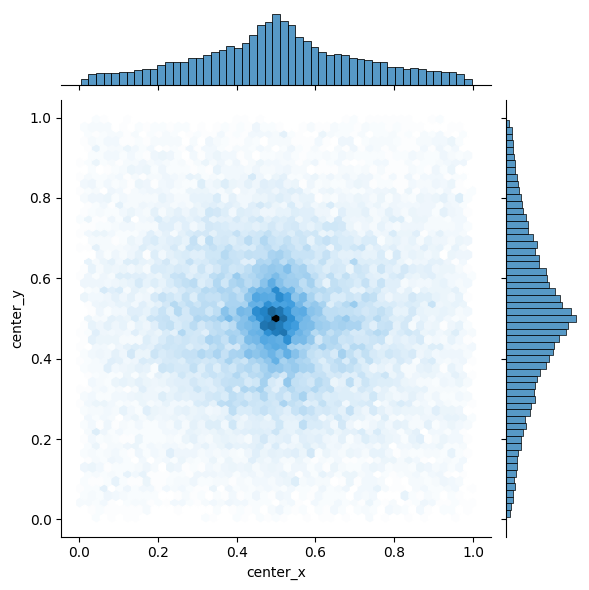

In [9]:
bbox_df['center_x'] = (bbox_df['x_min'] + bbox_df['x_max']) / 2
bbox_df['center_y'] = (bbox_df['y_min'] + bbox_df['y_max']) / 2
sns.jointplot(x='center_x', y='center_y', data=bbox_df, kind="hex")

### IoU 분포 확인

In [10]:
def calculate(box1, box2):
    x_min1, y_min1, x_max1, y_max1 = box1
    x_min2, y_min2, x_max2, y_max2 = box2
    
    inter_x_min = max(x_min1, x_min2)
    inter_y_min = max(y_min1, y_min2)
    inter_x_max = min(x_max1, x_max2)
    inter_y_max = min(y_max1, y_max2)
    
    # 교집합 넓이 계산
    inter_area = max(0, inter_x_max - inter_x_min) * max(0, inter_y_max - inter_y_min)
    
    # 각 바운딩 박스의 넓이 계산
    box1_area = (x_max1 - x_min1) * (y_max1 - y_min1)
    box2_area = (x_max2 - x_min2) * (y_max2 - y_min2)
    
    # 합집합 넓이 계산
    union_area = box1_area + box2_area - inter_area
    
    # IoU 계산
    iou = inter_area / union_area if union_area > 0 else 0
    return iou


In [15]:
bbox_df = pd.DataFrame()
bbox_df['image_id'] = train_df['image_id'].values
bbox_df['class_id'] = train_df['class_id'].values
bbox_df['class_name'] = train_df['class_name'].values

bbox_df['x_min'] = train_df['x_min'].values / 1024
bbox_df['x_max'] = train_df['x_max'].values / 1024
bbox_df['y_min'] = train_df['y_min'].values / 1024
bbox_df['y_max'] = train_df['y_max'].values / 1024
bbox_df['frac_x_min'] = train_df['x_min'].values / 1024
bbox_df['frac_x_max'] = train_df['x_max'].values / 1024
bbox_df['frac_y_min'] = train_df['y_min'].values / 1024
bbox_df['frac_y_max'] = train_df['y_max'].values / 1024

In [16]:
def get_max_iou(box, other_boxes, visited):
    max_iou = 0
    for other_box in other_boxes:
        if (box != other_box).all() and tuple(other_box) not in visited: 
            iou = calculate(box, other_box)
            max_iou = max(max_iou, iou)
    return max_iou


In [17]:
def calculate_max_iou_per_image(image_bboxes):
    max_ious = []
    visited = set()
    for bbox in image_bboxes:  
        max_iou = get_max_iou(bbox, image_bboxes, visited)
        visited.add(tuple(bbox))
        max_ious.append(max_iou)
    return max_ious

In [18]:
from tqdm import tqdm

all_max_ious = []
for image_id in tqdm(bbox_df['image_id'].unique(), desc="Calculating max IoU for each image"):
    image_bboxes = bbox_df[bbox_df['image_id'] == image_id][['x_min', 'y_min', 'x_max', 'y_max']].values
    max_ious = calculate_max_iou_per_image(image_bboxes) 
    all_max_ious.extend(max_ious)

bbox_df['max_iou'] = all_max_ious


Calculating max IoU for each image: 100%|██████████| 4883/4883 [00:13<00:00, 370.56it/s]


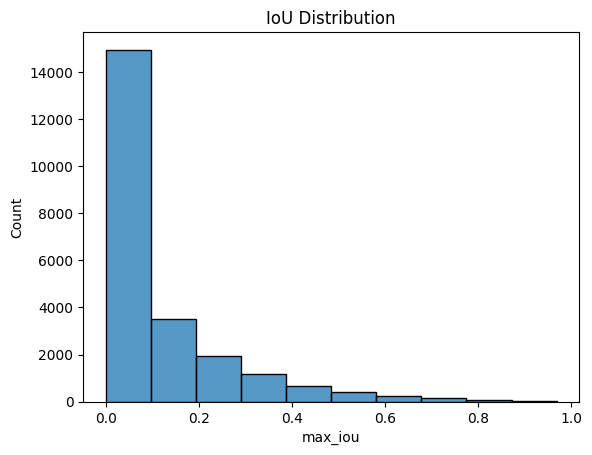

In [19]:
sns.histplot(bbox_df['max_iou'], bins=10)
plt.title('IoU Distribution')
plt.show()